In [1]:
import matplotlib
%pylab inline
from scipy import stats
import pandas as pd
import os
import pickle
import sys
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

from mpl_toolkits.mplot3d import Axes3D
rs=42

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#interactive script to collect results for tuning SVM for Reuters corpus

range of chosen C: 5-50
range of chosen Gamma: 0.15000000000000002-0.45
Variance of chosen C: 304.46498819826905
Variance of chosen Gamma: 0.003167453448728035
variance in estimated performance: 1.0884555032650634e-05


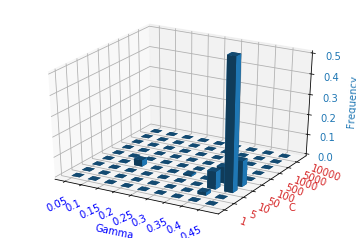

In [3]:
# R is number of repetitions
def repeatedchoicesplotter(R,K):
    #input R: is nuber of repetitions R (defined as J in paper)
    #input K: is number of folds (either 5,10)
    random.seed(rs)
    values=[]
    #load data
    #1000 independent prediction error estiamtes for each parameter value in the grid
    if (K==5):
        with open ('REUTERSSVM_differentpartitions_1000_5_folds', 'rb') as fp:
            results = pickle.load(fp)
    elif (K==10):
        with open ('REUTERSSVM_differentpartitions_1000_10_folds', 'rb') as fp:
            results = pickle.load(fp)     
    else:
        print("no precomputed data")
        return None
    #group K-fold CV into groups of R to allow R-K-fold CV
    for i in range(0,math.floor(1000/R)-1):
        means=list(results[i*R])
        #average across R K-fold CV grid searches 
        for j in range(1,R):
            new=results[i*R+j]
            #for each param choice
            for k in range(0,len(results[0])):
                means[k]=means[k]+new[k]
        for k in range(0,len(results[0])):
            means[k]=means[k]/R
        values.append(means)
    choicesofC=[]
    indexofCchoices=[]
    indexofGammachoices=[]
    choicesofGamma=[]
    Cparams=[1,5,10,50,100,500,1000,5000,10000]
    Gammaparams=[0.05*x for x in range(1,10)]
    #tuned values of params are maxima across the grids
    for i in range(0,len(values)):
        choicesofC.append(Cparams[math.floor(np.argmax(values[i])/9)])
        choicesofGamma.append(Gammaparams[(np.argmax(values[i]) % 9)])
        indexofCchoices.append(math.floor(np.argmax(values[i])/9))
        indexofGammachoices.append(np.argmax(values[i]) % 9)
    repeatedscores=[]
    for i in range(0,len(values)):
        repeatedscores.append((np.max(values[i])))
    
    #find range in chosen params
    print("range of chosen C: "+str(min(choicesofC))+"-"+str(max(choicesofC)))
    print("range of chosen Gamma: "+str(min(choicesofGamma))+"-"+str(max(choicesofGamma)))
    #find variance of parameter
    print("Variance of chosen C: "+str(np.var(choicesofC,ddof=1)))
    print("Variance of chosen Gamma: "+str(np.var(choicesofGamma,ddof=1)))
    #find variance in estiamted model performance
    print("variance in estimated performance: "+str(np.var(repeatedscores,ddof=1)))
    
    #make plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    hist, xedges, yedges = np.histogram2d( indexofGammachoices,indexofCchoices,bins=[np.arange(10),np.arange(10)],normed=True)
    xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1])
    xpos = xpos.flatten('F')
    ypos = ypos.flatten('F')
    zpos = np.zeros_like(xpos)
    dx = 0.5* np.ones_like(zpos)
    dy = dx.copy()
    dz = hist.flatten()
    ax.set_xlabel('Gamma',color='blue',labelpad=10)
    ax.set_ylabel('C',color='tab:red')
    ax.set_zlabel('Frequency',color='tab:blue')
    ax.set_zlim(0,0.5)
    ax.tick_params(colors='tab:blue')
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='tab:blue', zsort='average')
    xmarks=[i for i in range(0,8+1,1)]
    plt.xticks(xmarks)
    plt.yticks(xmarks)
    ax.set_xticklabels([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45],rotation=25,color='blue')    
    ax.set_yticklabels([1,5,10,50,100,500,1000,5000,10000],rotation=-20, va='center', ha='left',color='tab:red')
    plt.show()

    return [np.sqrt(np.var(choicesofC,ddof=1)),np.sqrt(np.var(choicesofGamma,ddof=1)),np.sqrt(np.var(repeatedscores,ddof=1)),choicesofC,choicesofGamma,indexofCchoices,indexofGammachoices]

    



REPS=repeatedchoicesplotter(8,5)